# <u>Variable Stars</u>
#### Written by Chien-Hsiu Li, NOAO

In this activity we are going to look at stars that change their magnitudes (brightness) in time. We can use a certain group of these stars to help estimate distances to other astronomical objects such as M31, our neighboring galaxy.


# Exercise 1: Finding the period of a star

In this exercise, we will learn how to display light curves (brightness as a function of time) and from the light curve, find the period of a variable star.


In [1]:
#fisrt we need to load some libraries/packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii


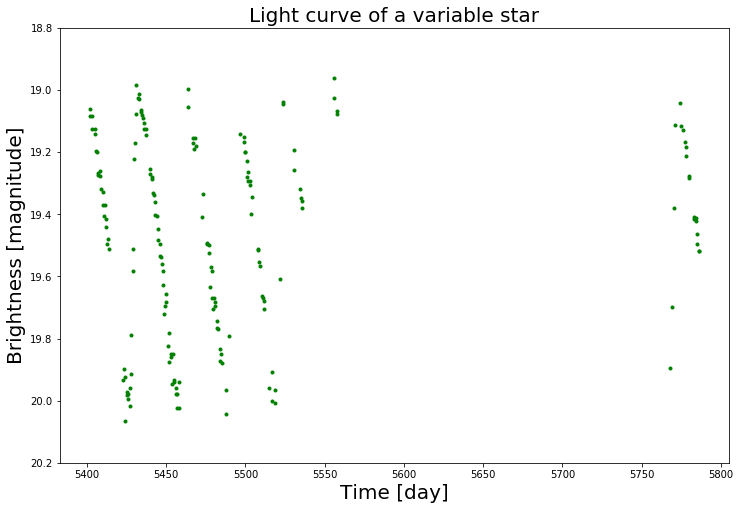

In [2]:
#then we read in the observation data and plot the light curve
lc=ascii.read('cep1862r.tab')
mjd, mag, err = lc['col1'], lc['col2'], lc['col3']

plt.figure(figsize=(12, 8))
plt.plot(mjd, mag, 'g.')
plt.xlabel('Time [day]', size=20)
plt.ylabel('Brightness [magnitude]', size=20)
plt.title('Light curve of a variable star', size=20)
plt.ylim(20.2,18.8)
#plt.rc('font', weight='bold')
plt.rc('xtick.major', size=10, pad=10)
plt.rc('ytick.major', size=10, pad=10)
plt.rc('ytick', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.show()

This is a good start and there appears to be a periodic nature to the star, so lets find the period.



In [3]:
#now we use a package to find the period
from gatspy.periodic import LombScargleFast

ls=LombScargleFast()
ls.optimizer.period_range = (0.1,100)
ls.fit(mjd,mag)
period0=ls.best_period
#print("Best period: " + str(period) + " days")

#periodogram
periods = np.linspace(1,100,1000)
scores = ls.score(periods)
plt.figure(figsize=(12, 8))
plt.plot(periods,scores)
plt.xlabel("Period [day]", size=20)
plt.ylabel("Likelihood", size=20)
plt.title("Lomb-Scargle-Periodogram", size=20)
plt.show()


ImportError: No module named gatspy.periodic

# Questions 1: Can you estimate the period from this diagram?



That was a great way to make sure we know the period. In fact, if we assume all the data sits on the same periodic function, we should be able to condense all the data to a single period, or "phased light curve". This will make it easier to read and see the period.

From the above diagram of likelihood versus period, you can probably determine the period of the variable star. But for arguments sake, let's play around with different periods, say from 10 to 60 days, and see which of their diagram of period versus brightness make sense.

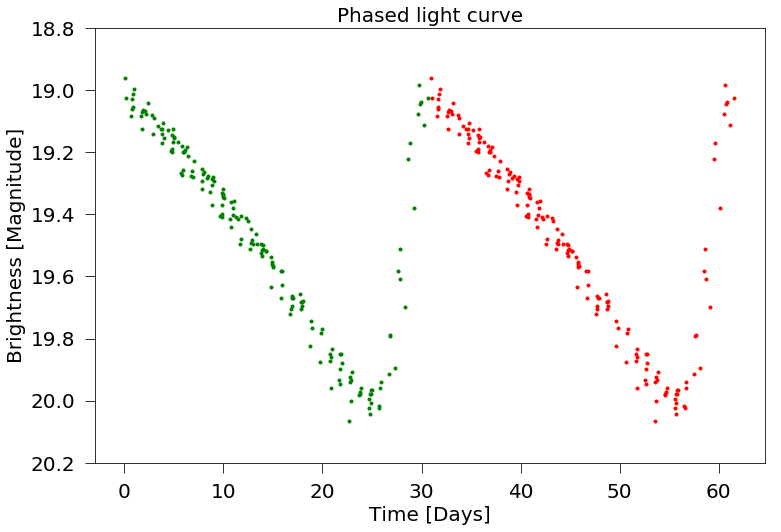

In [4]:
#print("Best period: " + str(period) + " days")
# put in a number between 10 and 60
#period=
period = 30.864572200228128

phase = np.zeros(shape=mjd.shape)
phase = np.fmod(mjd/period,1)

plt.figure(figsize=(12, 8))
plt.plot(phase*period,mag,"g.")
plt.plot((phase+1)*period,mag,"r.")
plt.ylim(20.2,18.8)
plt.xlabel('Time [Days]', size=20)
plt.ylabel('Brightness [Magnitude]', size=20)
plt.title('Phased light curve', size=20)
plt.show()

# Exercise 2: Classify the variable star

In this exercise, we will learn how to use a series of cosine and sine functions to model a light curve (so-called Fourier decomposition), and how we can use the resulting coefficients to classify the type of variable star.         

In [5]:
#definition of Fourier decomposition function
from scipy import optimize
pi=3.1415
def FourierDecomp(x, a0, a1, a2,a3,a4, b1, b2, b3, b4):
    return a0 + a1 * np.cos(2*pi* x) + a2 * np.cos(2*pi*2*x) + a3*np.cos(2*pi*3*x) + a4*np.cos(2*pi*4*x) + b1*np.sin(2*pi*x) + b2*np.sin(2*pi*2*x) + b3*np.sin(2*pi*3*x) + b4*np.sin(2*pi*4*x) 

#fit the light curve and show coefficients
params, params_covariance = optimize.curve_fit(FourierDecomp, phase, mag, p0=[19.5, 0, 0, 0, 0, 0, 0, 0, 0])

print(params)

[ 1.94966722e+01 -1.94155715e-01 -1.54943059e-01 -8.38526470e-02
 -3.34784959e-02 -3.48366141e-01 -6.25446030e-02  1.35368772e-02
  2.94198651e-02]


And plot the resulting curve on the data



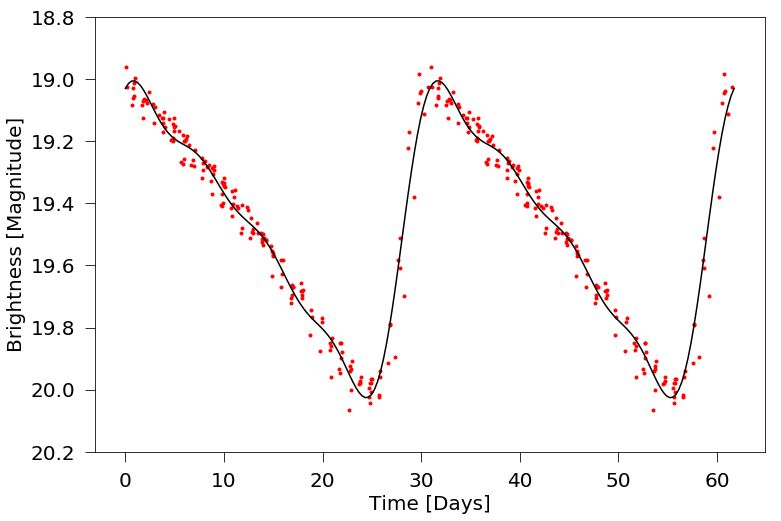

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(phase*period, mag, "r.", label='Data')
plt.plot((phase+1)*period, mag, "r.", label='Data')
p2=np.linspace(0,1,100)
plt.plot(p2*period, FourierDecomp(p2, params[0], params[1], params[2], params[3], params[4], params[5], params[6], params[7], params[8]), color='black', label='Fitted function')
plt.plot((p2+1)*period,FourierDecomp(p2, params[0], params[1], params[2], params[3], params[4], params[5], params[6], params[7], params[8]), color='black', label='Fitted function')
plt.xlabel('Time [Days]', size=20)
plt.ylabel('Brightness [Magnitude]', size=20)
plt.ylim(20.2,18.8)
plt.show()

From the light curve, use coefficients a4 and a2 to determine a4/a2 vs period.

In [7]:
print "a4/a2: ",params[4]/params[2], "log period: ", np.log10(period)

a4/a2:  0.21606967095470947 log period:  1.489460261786917


# Questions 2: Using a4/a2 and the period, can you detemine the type of this variable?

To determine the type of variable star from the period, check the classification diagram: 

<img src="TeenCafeClass.jpeg">

Now use this period with the Leavitt Law to determine luminosity (i.e., absolute magnitude or intrinsic brightness) and with that, get the distance. 

# Exercise 3: Use Leavitt Law to estimate distance

In this exercise, we will fit the data to determine the coefficients of Leavitt law, and from that, we can estimate the distance to our nearest spiral galaxy, M31.

<img src="TeenCafeDistance.jpeg">

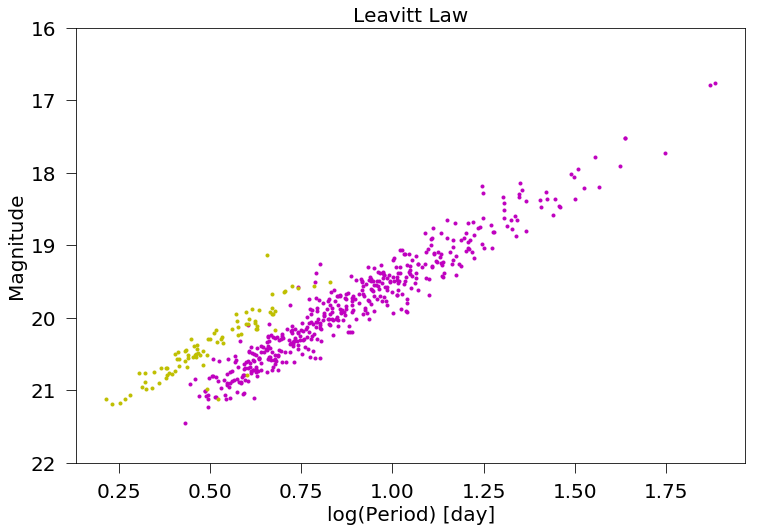

In [8]:
#read in data of Andromeda Cepheids
cep=ascii.read('cep.tab')
per, jmag, hmag, typ = cep['col1'], cep['col2'], cep['col3'], cep['col4']

plt.figure(figsize=(12, 8))
plt.plot(np.log10(per[cep['col4'] == 'FM']), jmag[cep['col4'] == 'FM'], 'm.')
plt.plot(np.log10(per[cep['col4'] == 'FO']), jmag[cep['col4'] == 'FO'], 'y.')

#plt.xscale("log")
plt.xlabel('log(Period) [day]', size=20)
plt.ylabel('Magnitude', size=20)
plt.title('Leavitt Law', size=20)
plt.ylim(22,16)
plt.show()

By fitting a line to the data in the diagram above (showing the Leavitt Law), the absolute magnitude (or luminosity) can be found. With the equation for a line y=ax+b, coefficient "a" is the slope of the line and coefficient "b" is the y value when x is zero. That y value is the absolute magnitude or luminosity of the variable star with a period of one day or log(0)=1. This value will be M1 in Question 3 below.

In [9]:
def Linear(x, a, b):
    return a*x + b 

params, params_covariance = optimize.curve_fit(Linear, np.log10(per[cep['col4'] == 'FM']), jmag[cep['col4'] == 'FM'], p0=[-1,22])

print"y = a*x + b, a=", params[0], " b=", params[1]

y = a*x + b, a= -2.8605633253145433  b= 22.365165662467653


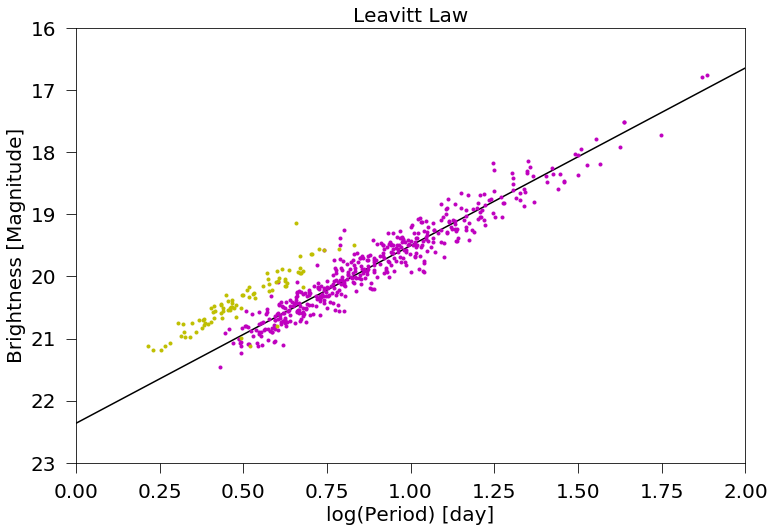

In [10]:
ppp=np.linspace(1,100,100)
#print p2

plt.figure(figsize=(12, 8))
plt.plot(np.log10(ppp), Linear(np.log10(ppp), params[0], params[1]), color='black', label='Fitted function')

plt.plot(np.log10(per[cep['col4'] == 'FM']), jmag[cep['col4'] == 'FM'], 'm.')
plt.plot(np.log10(per[cep['col4'] == 'FO']), jmag[cep['col4'] == 'FO'], 'y.')

#plt.xscale("log")
plt.xlabel('log(Period) [day]', size=20)
plt.ylabel('Brightness [Magnitude]', size=20)
plt.title('Leavitt Law', size=20)
plt.ylim(23,16)
plt.xlim(0,2)
plt.show()

# Question 3: Can you estimate the distance to Andromeda galaxy?

We can use the distance modulus to convert magnitude to distance:

M1 - M2 = 5 x log10(d1/d2)

or in terms of distance (d1):

d1 = d2*10^((M1-M2)/5)

To get d1, what value for M1 do you need to use from the Leavitt Law above?
See previous paragraph before Question 3.

Info you will need for M2 and d2: a 1-day period Cepheid has brightness of -2.1 magnitude at 10 pc.

You can use Python as a calculator to determine the distance. Try it yourself using pow(base,exponent) for base^(exponent). Check your answer with the distance here: https://en.wikipedia.org/wiki/Andromeda_Galaxy



In [11]:
#Now fill in M1, M2, and d2 below to get d1
M1 = 22.365165657
M2 = -2.1
d2 = 10

d1 = d2 * pow(10,(M1-M2)/5.)

print "Distance to Andromeda =", d1

Distance to Andromeda = 781687.435581


# Bonus question: Can you estimate the distance to Large Magellanic Cloud?


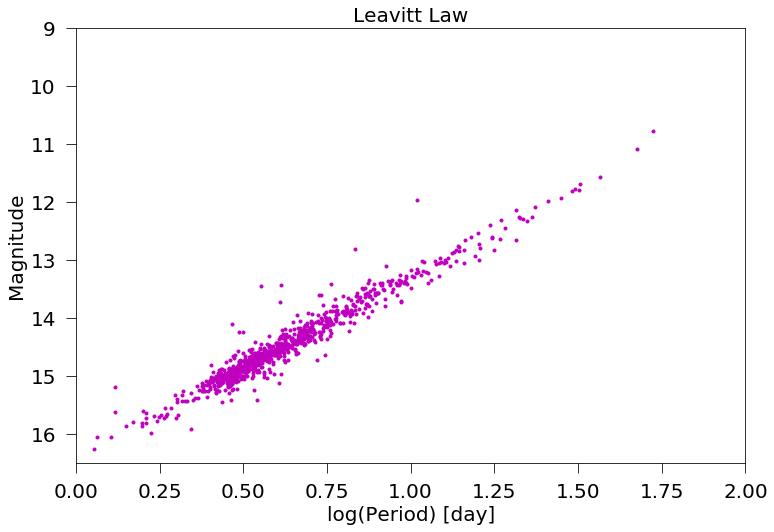

In [12]:
#read in data of LMC Cepheids
cep=ascii.read('lmc.tab')
per, jmag, hmag, typ = cep['col1'], cep['col2'], cep['col3'], cep['col4']

plt.figure(figsize=(12, 8))
plt.plot(np.log10(per[cep['col4'] == 'FM']), jmag[cep['col4'] == 'FM'], 'm.')

#plt.xscale("log")
plt.xlabel('log(Period) [day]', size=20)
plt.ylabel('Magnitude', size=20)
plt.title('Leavitt Law', size=20)
plt.ylim(16.5,9)
plt.xlim(0.0,2)
plt.show()

y = a*x + b, a= -3.1182532326442356  b= 16.411415358501355


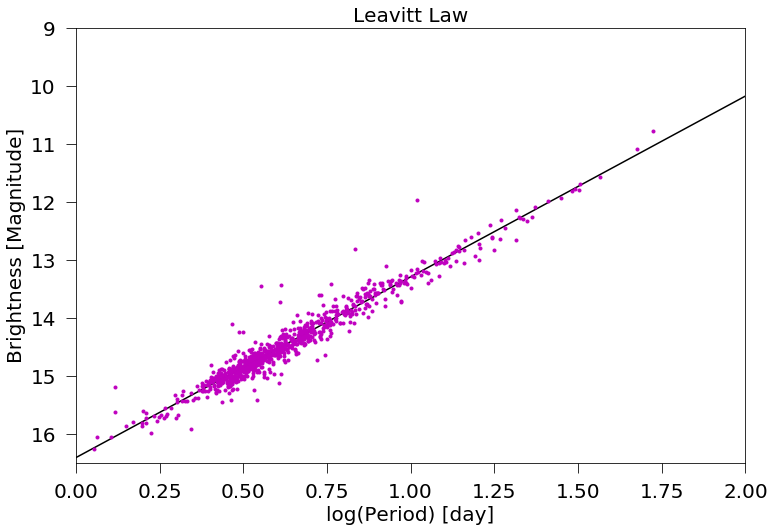

In [13]:
params, params_covariance = optimize.curve_fit(Linear, np.log10(per[cep['col4'] == 'FM']), jmag[cep['col4'] == 'FM'], p0=[-1,22])

print"y = a*x + b, a=", params[0], " b=", params[1]
ppp=np.linspace(1,500,100)
#print p2

plt.figure(figsize=(12, 8))
plt.plot(np.log10(ppp), Linear(np.log10(ppp), params[0], params[1]), color='black', label='Fitted function')

plt.plot(np.log10(per[cep['col4'] == 'FM']), jmag[cep['col4'] == 'FM'], 'm.')

#plt.xscale("log")
plt.xlabel('log(Period) [day]', size=20)
plt.ylabel('Brightness [Magnitude]', size=20)
plt.title('Leavitt Law', size=20)
plt.ylim(16.5,9)
plt.xlim(0,2)
plt.show()


In [14]:
#Now fill in M1, M2, and d2 below to get d1
M1 = 16.4114153606
M2 = -2.1
d2 = 10

d1 = d2 * pow(10,(M1-M2)/5.)

print "Distance to LMC =", d1

Distance to LMC = 50382.8896275
